# Exploratory Data Analysis
Then cleaning/ preparation/ transformation

In [1]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/compas/compas-scores-raw.csv")
df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
Person_ID                  60843 non-null int64
AssessmentID               60843 non-null int64
Case_ID                    60843 non-null int64
Agency_Text                60843 non-null object
LastName                   60843 non-null object
FirstName                  60843 non-null object
MiddleName                 15648 non-null object
Sex_Code_Text              60843 non-null object
Ethnic_Code_Text           60843 non-null object
DateOfBirth                60843 non-null object
ScaleSet_ID                60843 non-null int64
ScaleSet                   60843 non-null object
AssessmentReason           60843 non-null object
Language                   60843 non-null object
LegalStatus                60843 non-null object
CustodyStatus              60843 non-null object
MaritalStatus              60843 non-null object
Screening_Date             60843 non-null object
RecSupervisio

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.count()

Person_ID                  60843
AssessmentID               60843
Case_ID                    60843
Agency_Text                60843
LastName                   60843
FirstName                  60843
MiddleName                 15648
Sex_Code_Text              60843
Ethnic_Code_Text           60843
DateOfBirth                60843
ScaleSet_ID                60843
ScaleSet                   60843
AssessmentReason           60843
Language                   60843
LegalStatus                60843
CustodyStatus              60843
MaritalStatus              60843
Screening_Date             60843
RecSupervisionLevel        60843
RecSupervisionLevelText    60843
Scale_ID                   60843
DisplayText                60843
RawScore                   60843
DecileScore                60843
ScoreText                  60798
AssessmentType             60843
IsCompleted                60843
IsDeleted                  60843
dtype: int64

In [6]:
# here I print all those cols that have >80% NULL entries 
# I just do this as a training for myself, of course I can see from count() that only one col applies

for column in df:
    name = "Person_ID"
    #print(column)
    print(len(df[column]))
    #print(df)
    
    if df.count()[column] / len(df) < 0.8:
        del df[column]
        print(column, "is deleted")
        
    if column == name: # if I want to make this a function, I'll need a try catch here
        del df[column]
        print(name, "is deleted")

df.count()
        
    

60843
Person_ID is deleted
60843
60843
60843
60843
60843
60843
MiddleName is deleted
60843
60843
60843
60843
60843
60843
60843
60843
60843
60843
60843
60843
60843
60843
60843
60843
60843
60843
60843
60843
60843


AssessmentID               60843
Case_ID                    60843
Agency_Text                60843
LastName                   60843
FirstName                  60843
Sex_Code_Text              60843
Ethnic_Code_Text           60843
DateOfBirth                60843
ScaleSet_ID                60843
ScaleSet                   60843
AssessmentReason           60843
Language                   60843
LegalStatus                60843
CustodyStatus              60843
MaritalStatus              60843
Screening_Date             60843
RecSupervisionLevel        60843
RecSupervisionLevelText    60843
Scale_ID                   60843
DisplayText                60843
RawScore                   60843
DecileScore                60843
ScoreText                  60798
AssessmentType             60843
IsCompleted                60843
IsDeleted                  60843
dtype: int64

In [7]:
df["Ethnic_Code_Text"].describe()

count                60843
unique                   9
top       African-American
freq                 27018
Name: Ethnic_Code_Text, dtype: object

In [8]:
x = df["Ethnic_Code_Text"].describe()
print("Proportion of", x["top"], ": ", (x["freq"]/x["count"])* 100, "%" )

Proportion of African-American :  44.40609437404468 %


In [9]:
ecodes = set([])
for code in df["Ethnic_Code_Text"]:
    if code in ecodes:
        continue
    else:
        ecodes.add(code)
print(ecodes)

{'African-American', 'Caucasian', 'African-Am', 'Asian', 'Arabic', 'Other', 'Oriental', 'Hispanic', 'Native American'}


In [10]:

efreq = {}
for code in ecodes:
    efreq[code] = 0

for code in df['Ethnic_Code_Text']:
    efreq[code] += 1
print(efreq)
for i in efreq:
    print(i, ': ', efreq[i], "\t\t~", round(efreq[i]/len(df)*100), '%\n')

{'African-American': 27018, 'Caucasian': 21783, 'African-Am': 51, 'Asian': 324, 'Arabic': 75, 'Other': 2592, 'Oriental': 39, 'Hispanic': 8742, 'Native American': 219}
African-American :  27018 		~ 44 %

Caucasian :  21783 		~ 36 %

African-Am :  51 		~ 0 %

Asian :  324 		~ 1 %

Arabic :  75 		~ 0 %

Other :  2592 		~ 4 %

Oriental :  39 		~ 0 %

Hispanic :  8742 		~ 14 %

Native American :  219 		~ 0 %



In [11]:
df["RawScore"].describe()

count    60843.000000
mean         5.081457
std         10.080518
min         -4.790000
25%         -2.090000
50%         -0.710000
75%         14.000000
max         51.000000
Name: RawScore, dtype: float64

In [12]:
max = 1
for i in df["RawScore"]:
    if i > max:
        max = i
print(max)

51.0


In [13]:
df["LastName"].describe()

count        60843
unique       10896
top       Williams
freq           417
Name: LastName, dtype: object

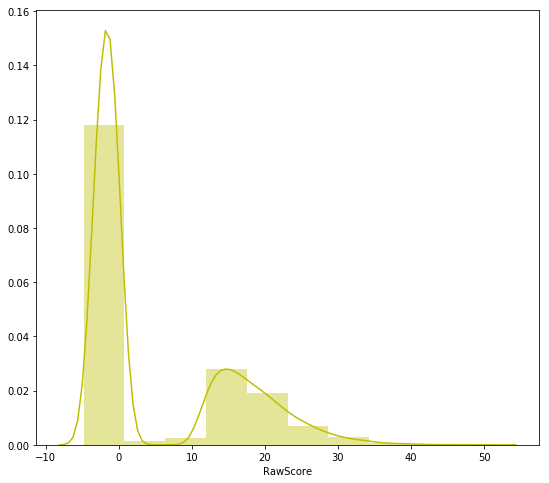

In [14]:
plt.figure(figsize=(9, 8))
sns.distplot(df['RawScore'], color='y', bins=10, hist_kws={'alpha': 0.4});

In [15]:
ecodes_structured = []
for i in ecodes:
    ecodes_structured.append(i)
#print(dir(ecodes_structured))
#print(ecodes_structured)
# now they have indices
for i in range(len(df['Ethnic_Code_Text'])):
    #print(df.loc[i,'Ethnic_Code_Text'])
    for e in ecodes_structured:
        if df['Ethnic_Code_Text'][i] == e:
            #df['Ethnic_Code_Text'][i] = ecodes_structured.index(e)
            df.loc[i,'Ethnic_Code_Text'] = ecodes_structured.index(e)
            #print('here', ecodes_structured.index(e))
#print(df['Ethnic_Code_Text'])

In [16]:
print(df['Ethnic_Code_Text'])

0        1
1        1
2        1
3        1
4        1
5        1
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       7
16       7
17       7
18       1
19       1
20       1
21       0
22       0
23       0
24       5
25       5
26       5
27       1
28       1
29       1
        ..
60813    5
60814    5
60815    5
60816    0
60817    0
60818    0
60819    1
60820    1
60821    1
60822    1
60823    1
60824    1
60825    1
60826    1
60827    1
60828    7
60829    7
60830    7
60831    1
60832    1
60833    1
60834    1
60835    1
60836    1
60837    0
60838    0
60839    0
60840    1
60841    1
60842    1
Name: Ethnic_Code_Text, Length: 60843, dtype: int64


In [17]:
df["Ethnic_Code_Text"].describe()

count    60843.000000
mean         1.632020
std          2.474771
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Ethnic_Code_Text, dtype: float64

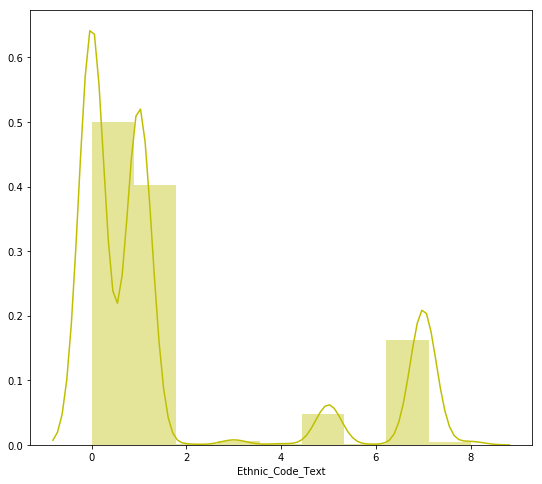

In [18]:
plt.figure(figsize=(9, 8))
sns.distplot(df['Ethnic_Code_Text'], color='y', bins=9, hist_kws={'alpha': 0.4});

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 26 columns):
AssessmentID               60843 non-null int64
Case_ID                    60843 non-null int64
Agency_Text                60843 non-null object
LastName                   60843 non-null object
FirstName                  60843 non-null object
Sex_Code_Text              60843 non-null object
Ethnic_Code_Text           60843 non-null int64
DateOfBirth                60843 non-null object
ScaleSet_ID                60843 non-null int64
ScaleSet                   60843 non-null object
AssessmentReason           60843 non-null object
Language                   60843 non-null object
LegalStatus                60843 non-null object
CustodyStatus              60843 non-null object
MaritalStatus              60843 non-null object
Screening_Date             60843 non-null object
RecSupervisionLevel        60843 non-null int64
RecSupervisionLevelText    60843 non-null object
Scale_ID      

In [20]:
df_numerical = df.select_dtypes(['int64','float64'])
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 10 columns):
AssessmentID           60843 non-null int64
Case_ID                60843 non-null int64
Ethnic_Code_Text       60843 non-null int64
ScaleSet_ID            60843 non-null int64
RecSupervisionLevel    60843 non-null int64
Scale_ID               60843 non-null int64
RawScore               60843 non-null float64
DecileScore            60843 non-null int64
IsCompleted            60843 non-null int64
IsDeleted              60843 non-null int64
dtypes: float64(1), int64(9)
memory usage: 4.6 MB


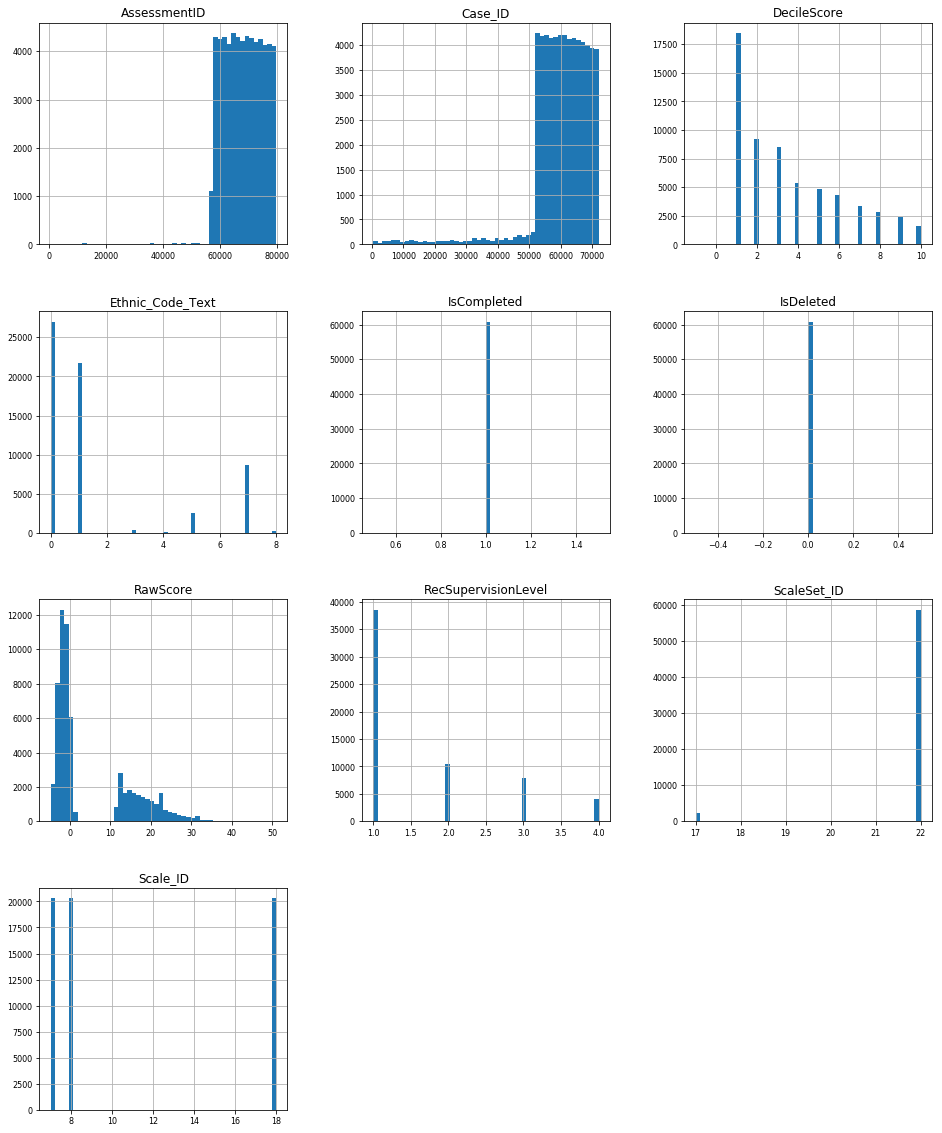

In [21]:
df_numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [22]:
df_corr = df_numerical.corr()['Ethnic_Code_Text']
#print(df_corr['Ethnic_Code_Text'])# -1 because the latest row is SalePrice
features_list = df_corr[abs(df_corr) > 0.01]#.sort_values(ascending=False)
print(features_list)
print(type(features_list))
del features_list['Ethnic_Code_Text']
a = features_list.abs().max()
for i in range(len(df_corr)):
    if df_corr[i] == a:
        print(df_corr[i])
print(a.item()*100)
#print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

AssessmentID           0.031090
Case_ID                0.070517
Ethnic_Code_Text       1.000000
ScaleSet_ID            0.033289
RecSupervisionLevel   -0.193456
RawScore              -0.032639
DecileScore           -0.173304
Name: Ethnic_Code_Text, dtype: float64
<class 'pandas.core.series.Series'>
19.345592946565596


ANGRYY I CANNOT GET IT TO PRINT THE STUPID KEY MAX CORRELATION KEY


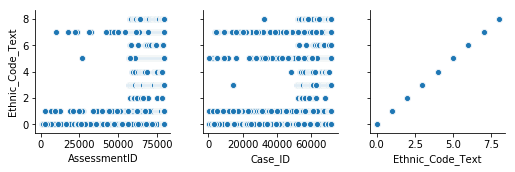

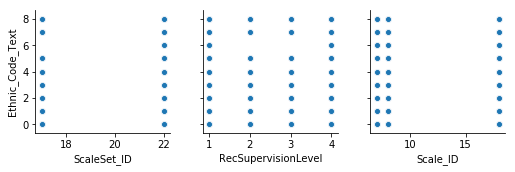

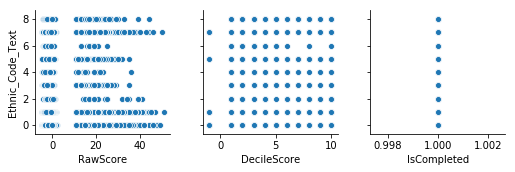

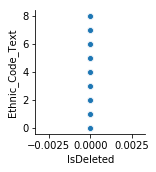

In [23]:
for i in range(0, len(df_numerical.columns), 3):
    sns.pairplot(data=df_numerical,
                x_vars=df_numerical.columns[i:i+3],
                y_vars=['Ethnic_Code_Text'])

Quick interpretation from left to right:
Assessment ID should be distributed equally among ethnicities, however, we can see, that certain ethnicities only get high IDs.
Case ID is similar to Assessment ID one could think that these are correlated. Surprisingly ethnicity 3 is more equally distributed and Case ID has some outliers for other ethnicities
Ethnicity Graph is redundant
ScaleSet, RecSupervision and Scale are the same for all ethnicities except 8, 8 doesnt have medium RecSupervisionLevel or low ScaleSet
RawScore There's a gap for scores 0-5 which is basically never given. It is sensational that ethnicities 2,4,5 and 7 have more member with higher scores than the others!
Decile Score is negativer for ethnicities 2,3,4,5 and seems lower for ethnicity 8
IsCompleted and IsDeleted are redundant

Next step I want to focus on three ethnicities namely 2,4,5,8 

In [24]:
df_test = df_numerical[df_numerical.Ethnic_Code_Text != 0]
df_test.count()
df_numerical.count()

#df_test = df_numerical
#for i in range(len(df_test['Ethnic_Code_Text'])):
#    e = df_test['Ethnic_Code_Text'][i]
#    if e == 1 or e == 3 or  e == 6 or  e == 7:#2 or 4 or 5 or 8:
#        print("Dropped", df_test.index[i], "where ethnicity = ", df_test['Ethnic_Code_Text'][i])
#        df_test.drop(df_test.index[i])
#        #print('here', ecodes_structured.index(e))



AssessmentID           60843
Case_ID                60843
Ethnic_Code_Text       60843
ScaleSet_ID            60843
RecSupervisionLevel    60843
Scale_ID               60843
RawScore               60843
DecileScore            60843
IsCompleted            60843
IsDeleted              60843
dtype: int64

Ok,
I have to look into Pyhton's List Comprehension.
I tend to loop over arrays, but I just learned that I can binary mask them, which is INCREDIBLY much faster (of course)
I can do that in the code snippet right after the yellow graph also, where I replace Ethnicity Text by Numerical Values!!!

In [25]:
df_test["Ethnic_Code_Text"].describe()

count    33825.000000
mean         2.935610
std          2.681358
min          1.000000
25%          1.000000
50%          1.000000
75%          7.000000
max          8.000000
Name: Ethnic_Code_Text, dtype: float64

In [26]:
df_test.Ethnic_Code_Text.describe()

count    33825.000000
mean         2.935610
std          2.681358
min          1.000000
25%          1.000000
50%          1.000000
75%          7.000000
max          8.000000
Name: Ethnic_Code_Text, dtype: float64

In [27]:
print(df_test.corr()['Ethnic_Code_Text'])
df_test.corr()['Ethnic_Code_Text'].drop('Ethnic_Code_Text').abs().max()*100

AssessmentID           0.013640
Case_ID                0.025685
Ethnic_Code_Text       1.000000
ScaleSet_ID            0.006054
RecSupervisionLevel   -0.040534
Scale_ID               0.000000
RawScore              -0.018394
DecileScore           -0.054057
IsCompleted                 NaN
IsDeleted                   NaN
Name: Ethnic_Code_Text, dtype: float64


5.405708765360892

Correlation is 3% greater if we neglect minorities and focus of the most often occuring ethnicity

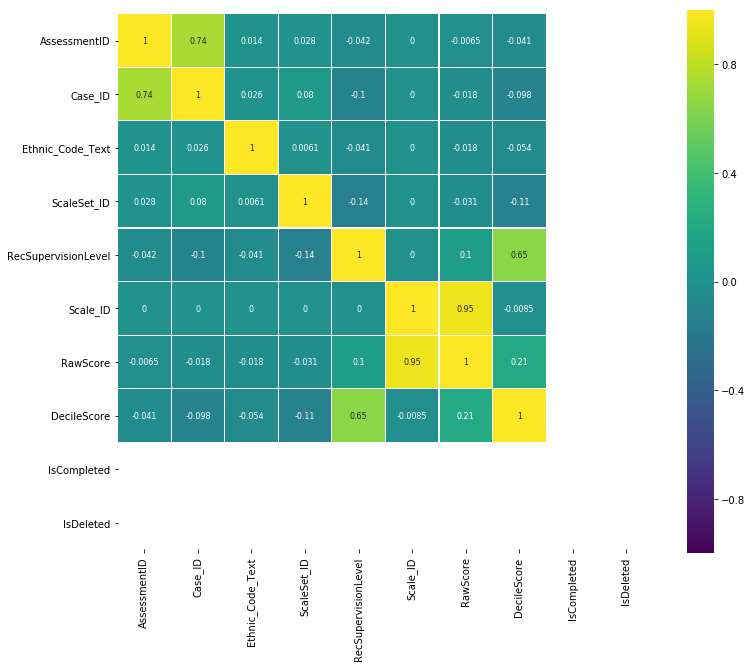

In [28]:
#corr = df_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(df_test.corr(), 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [29]:
df_test

,AssessmentID,Case_ID,Ethnic_Code_Text,ScaleSet_ID,RecSupervisionLevel,Scale_ID,RawScore,DecileScore,IsCompleted,IsDeleted
0,57167,51950,1,22,1,7,-2.08,4,1,0
1,57167,51950,1,22,1,8,-1.06,2,1,0
2,57167,51950,1,22,1,18,15.00,1,1,0
3,57174,51956,1,22,1,7,-2.84,2,1,0
4,57174,51956,1,22,1,8,-1.50,1,1,0
5,57174,51956,1,22,1,18,19.00,3,1,0
15,57179,51961,7,22,3,7,-1.33,7,1,0
16,57179,51961,7,22,3,8,0.71,10,1,0
17,57179,51961,7,22,3,18,24.00,6,1,0
18,57163,51946,1,22,1,7,-3.01,1,1,0
